In [1]:
import numpy as np

time_steps = 200
input_features = 16
output_features = 32

inputs = np.random.random((time_steps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    state_t = output_t
    successive_outputs.append(state_t)

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [2]:
print(successive_outputs[0])
print(len(successive_outputs))

[0.99881784 0.99999082 0.99967129 0.99989333 0.99997973 0.9999809
 0.99986021 0.99916548 0.99999707 0.99999178 0.99894989 0.9998776
 0.99956769 0.99985307 0.99997672 0.99966327 0.99942121 0.99990075
 0.99956046 0.99969088 0.99975998 0.99987949 0.99881629 0.99986533
 0.99996052 0.99996893 0.99987984 0.99978084 0.99996293 0.99986633
 0.99982187 0.99995213]
200


In [3]:
final_output_sequence.shape

(6400,)

In [4]:
print(final_output_sequence[1])

0.9999908247276798


In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

batch_size = 32
maxlen = 500
max_features = 10000

(train_texts, train_labels), (test_texts, test_labels) = imdb.load_data(num_words=max_features)

print(len(train_texts))

25000


In [6]:
print(train_texts.shape)

(25000,)


In [7]:
train_x = sequence.pad_sequences(train_texts, maxlen=maxlen)
test_x = sequence.pad_sequences(test_texts, maxlen=maxlen)

In [8]:
print(train_x.shape)

(25000, 500)


In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length=maxlen))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_x, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 174ms/step - loss: 0.6274 - acc: 0.6382 - val_loss: 0.3968 - val_acc: 0.8338
Epoch 2/10
157/157 [==============================] - 29s 184ms/step - loss: 0.3676 - acc: 0.8485 - val_loss: 0.3707 - val_acc: 0.8406
Epoch 3/10
157/157 [==============================] - 24s 153ms/step - loss: 0.2799 - acc: 0.8934 - val_loss: 0.4291 - val_acc: 0.8320
Epoch 4/10
157/157 [==============================] - 23s 144ms/step - loss: 0.2523 - acc: 0.9035 - val_loss: 0.4386 - val_acc: 0.7982
Epoch 5/10
157/157 [==============================] - 22s 142ms/step - loss: 0.2143 - acc: 0.9196 - val_loss: 0.3674 - val_acc: 0.8570
Epoch 6/10
157/157 [==============================] - 22s 143ms/step - loss: 0.1833 - acc: 0.9334 - val_loss: 0.4444 - val_acc: 0.8584
Epoch 7/10
157/157 [==============================] - 20s 127ms/step - loss: 0.1437 - acc: 0.9498 - val_loss: 0.4008 - val_acc: 0.8594
Epoch 8/10
157/157 [==============================] - 2

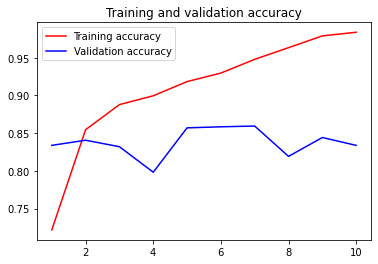

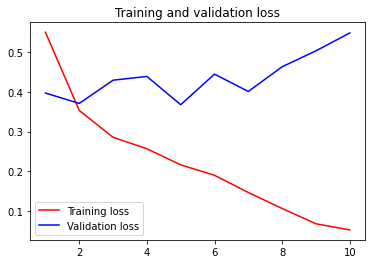

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# overfitting

In [12]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length=maxlen))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_x, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 52s 314ms/step - loss: 0.6141 - acc: 0.6655 - val_loss: 0.3536 - val_acc: 0.8640
Epoch 2/10
157/157 [==============================] - 49s 312ms/step - loss: 0.2985 - acc: 0.8856 - val_loss: 0.3114 - val_acc: 0.8658
Epoch 3/10
157/157 [==============================] - 50s 316ms/step - loss: 0.2316 - acc: 0.9127 - val_loss: 0.2938 - val_acc: 0.8854
Epoch 4/10
157/157 [==============================] - 53s 340ms/step - loss: 0.2043 - acc: 0.9305 - val_loss: 0.3599 - val_acc: 0.8818
Epoch 5/10
157/157 [==============================] - 53s 337ms/step - loss: 0.1734 - acc: 0.9383 - val_loss: 0.3288 - val_acc: 0.8882
Epoch 6/10
157/157 [==============================] - 51s 327ms/step - loss: 0.1566 - acc: 0.9434 - val_loss: 0.3769 - val_acc: 0.8722
Epoch 7/10
157/157 [==============================] - 50s 317ms/step - loss: 0.1360 - acc: 0.9530 - val_loss: 0.4063 - val_acc: 0.8726
Epoch 8/10
157/157 [==============================] - 4

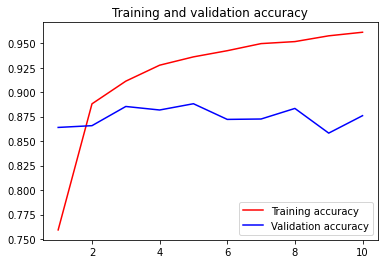

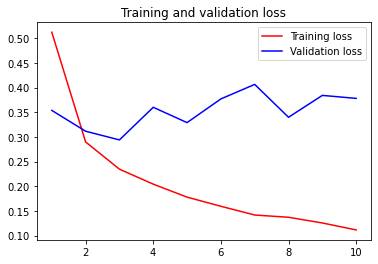

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()